# **House Price Prediction with Linear, Lasso and Ridge Regression, and Random Forest**

The aim of this project is to predict real-estate prices using the machine learning algorithm, Linear, Ridge and Lasso Regression, and Random Forest. 

This file is the EDA and its purpose is to go through the sevarl steps of working with data - data gathering, data understanding, data preparation. Visualization of the information is made for better understanding. 

# **Data storage solution:**
An essential part of Machine Learning is the data storage solution for the selected data and machine learning model. In order to accomplish the most efficient manner of working with data during this project, the following tools were used:
* Git Version Control 
* Data Version Control (DVC)

**Git Version Control:**
Git has been a popular tool among programmers and it is so for a reason. It allows tracking changes in any set of files, usually used for coordinating work among programmers collaboratively developing source code during software development.

**Data Version Control (DVC):**
Data Version Control is a new type of data versioning, workflow, and experiment management software that builds upon Git (although it can work stand-alone). Using Git and DVC, machine learning teams can version experiments, manage large datasets, and make projects reproducible. By utilizing DVC data will be tracked and stored in an effective and efficient way because the data is accessible from everywhere via internet connection for every contributor.

**Summary:**
* DVC will create reference files to data versions
* Git will store the DVC files

In this project, I decided to not use extraction from a csv file for the data, but to scrape it. Web scraping is the process of using bots to extract content and data from a website. Scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere. After extracting the data from two different websites - ‘Pararius’ (https://www.pararius.com/apartments/eindhoven )and ‘Friendly Housing’ (https://www.friendlyhousing.nl/nl ). Changes were made to like cleaning and processing it so as to make it more suitable to work with and acceptable to store.


# **Imports**

In [156]:
!pip install geopandas
!pip install geopy

In [157]:
!pip install contextily
!pip install geocoder

In [158]:
from bs4 import BeautifulSoup as bs4
from requests import get
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import numpy as np
%matplotlib inline
#from fake_useragent import UserAgent

# **Data collection (Web scraping)**

Scraping data from the first website - 'FriendlyHousing'

In [159]:
url_1 = 'https://www.friendlyhousing.nl/nl/aanbod/kamer'
url_2 = 'https://www.friendlyhousing.nl/nl/aanbod/studio'
url_3 = 'https://www.friendlyhousing.nl/nl/aanbod/appartement'
urls= [url_1, url_2, url_3]

Scraping data from the second website - 'Pararius'

In [160]:
url_1p = 'https://www.pararius.com/apartments/eindhoven'
url_2p = 'https://www.pararius.com/apartments/eindhoven/page-2'
url_3p = 'https://www.pararius.com/apartments/eindhoven/page-3'
urls_p= [url_1p, url_2p, url_3p]


'FriendlyHousing'

In [161]:
#user_agent = UserAgent()
#headers={"user-agent": user_agent.chrome}
soup_array=[]
for url in urls:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    agency_fr = soup.find('div', class_= 'copyright').text
    soup_array.append(soup)
    #print(agency_fr[15:23])

'Pararius'

In [162]:
soup_array_p=[]
for url in urls_p:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    agency = soup.find('a', class_= 'masthead__logo').text 

    soup_array_p.append(soup)
    #print(soup_array_p)

'FriendlyHousing' - finding the elements from the html file

In [163]:
houses=[]

for s in soup_array:
    allHouses = s.find("ul", {"class": "list list-unstyled row equal-row"})
    for h in allHouses.find_all("li", {"class": "col-xs-12 col-sm-6 col-md-4 equal-col"}):
     # print(h)
      
      houses.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [164]:
catalog=[]
for h in houses:
  #data['houses'].append({
      agency_friendly = agency_fr[15:23]
      type__= h.find('div', class_= 'specs').text
      t = type__.split()
      type_=t[0]
      street_ = h.find('h3').text
      s = street_.split()
      street = s[0]
      address = h.find('p').text
      a = address.split()
      postcode = a[0]
      #city = a[2]
      price = h.find('div', class_= 'price').text
      vars = agency_friendly, type_,street, postcode, price
      catalog.append(vars)
      print(agency_friendly)
      

Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
Friendly
F

'Pararius' - finding the elements from the html file

In [165]:
houses_p=[]
for s in soup_array_p:
    allHouses = s.find("ul", {"class": "search-list"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "search-list__item search-list__item--listing"}):
     # print(h)
      
      houses_p.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))


In [166]:
catalog_p=[]
for h in houses_p:
  #data['houses'].append({
        name = h.find('a',class_='listing-search-item__link listing-search-item__link--title').text
        _name = name.split()
        house_type = _name[0]
        if len(_name) == 5:
          street = _name[1] + _name[2] + _name[3] + _name[4]
        elif len(_name) == 4:
          street = _name[1] + _name[2] + _name[3]
        elif len(_name) == 3:
          street = _name[1] + _name[2]
        else: 
          street = _name[1]
        _address= h.findAll('div', class_='listing-search-item__location')[0].text
        #String manipulation to remove the unwanted signs from the address
        __address = _address.replace("\nnew\n ", "") 
        address = __address.replace("\n ", "")   #actual address after string manipulation - ready to be used in the exploring of the data
        new_address = address.split()
        if new_address[0] == 'new':
            postcode=0
        else:
            postcode = new_address[0] 
        price_ = h.findAll('span', class_='listing-search-item__price')[0].text
        #splitting the string to find the price
        p=price_.split()
        _price = p[0] #actual price before string manipulation
        __price = _price.replace("€", "")  #actual price before full string manipulation
        price = __price.replace(",", "")   #actual price after string manipulation - ready to be used in the exploring of the data

        #finding the whole element from the web page
        ylr= h.findAll('section', class_= 'illustrated-features illustrated-features--vertical')[0].text 

        #splitting the string to find the living are, rooms and year
        lry= ylr.split()

        #living_area after taking the indexes that define it
        living_area = lry[0] 

        #rooms after taking the index that defines the variable
        rooms = lry[4] 
    
        vars = agency,house_type, street, postcode,price,living_area,rooms
        catalog_p.append(vars)
        #print(_name)
        #print(agency)
        #print(postcode)


'FriendlyHousing' - creating the dataframe

In [167]:
dataframe = pd.DataFrame(catalog)
dataframe.columns=['AGENCY', 'TYPE', 'STREET NAME', 'POSTCODE', 'PRICE'] 
dataframe 

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE
0,Friendly,Kamer,Korianderstraat,5643,420
1,Friendly,Kamer,Wattstraat,5621,440
2,Friendly,Kamer,Wattstraat,5621,415
3,Friendly,Kamer,Tongelresestraat,5642,415
4,Friendly,Kamer,Schootsestraat,5616,435
...,...,...,...,...,...
138,Friendly,Appartement,Frankrijkstraat,5622,925
139,Friendly,Appartement,Kerkakkerstraat,5616,950
140,Friendly,Appartement,Leenderweg,5614,800
141,Friendly,Appartement,Leostraat,5615,775


'Pararius'- creating the dataframe

In [168]:
df_ = pd.DataFrame(catalog_p)
df_.columns=['AGENCY', 'TYPE', 'STREET NAME', 'POSTCODE', 'PRICE','LIVING_AREA', 'ROOMS'] 
df_ 

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Pararius,Apartment,Brucknerplein,5653,2500,57,2
1,Pararius,Room,vanKinsbergenstraat,5612,1500,18,1
2,Pararius,Apartment,DrCuyperslaan,5623,2750,50,2
3,Pararius,House,RodeHeikorstlaan6,5646,4350,89,5
4,Pararius,Apartment,Kastelenplein143,5653,1900,55,2
...,...,...,...,...,...,...,...
91,Pararius,House,Mathijsenlaan,5644,3650,165,7
92,Pararius,Apartment,LeSagetenBroeklaan,5615,1300,63,2
93,Pararius,Apartment,Kerkakkerstraat,5616,1500,55,2
94,Pararius,Apartment,Hertogstraat,5611,1300,100,3


# **Data integration**



> Using concat to create a `Union` between the two datasets and then, integrate them into one dataset.



In [169]:
frames = [dataframe, df_]

In [170]:
df = pd.concat(frames)
df

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Friendly,Kamer,Korianderstraat,5643,420,NaN,NaN
1,Friendly,Kamer,Wattstraat,5621,440,NaN,NaN
2,Friendly,Kamer,Wattstraat,5621,415,NaN,NaN
3,Friendly,Kamer,Tongelresestraat,5642,415,NaN,NaN
4,Friendly,Kamer,Schootsestraat,5616,435,NaN,NaN
...,...,...,...,...,...,...,...
91,Pararius,House,Mathijsenlaan,5644,3650,165,7
92,Pararius,Apartment,LeSagetenBroeklaan,5615,1300,63,2
93,Pararius,Apartment,Kerkakkerstraat,5616,1500,55,2
94,Pararius,Apartment,Hertogstraat,5611,1300,100,3


> After the integration, it is noticeable there are missing values.

# **Data analysis**

# Checking the dimension of the dataset and the features.





Take a look at the summary of the numerical fields.



In [171]:
#Description of the dataset
df.describe()

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
count,239,239,239,239,239,96,96
unique,2,6,117,25,119,59,8
top,Friendly,Apartment,Geldropseweg,5612,415,12,1
freq,143,65,10,38,16,6,38


In [172]:
# Check the dimension of the dataset
df.shape

(239, 7)

>The dataset has changing observations(rows), depending on the housing properties on the websites, and 6 features. The data is scraped and this means it is up to date. Whenever there is a change on the websites, there is a change in the dataset.


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 95
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGENCY       239 non-null    object
 1   TYPE         239 non-null    object
 2   STREET NAME  239 non-null    object
 3   POSTCODE     239 non-null    object
 4   PRICE        239 non-null    object
 5   LIVING_AREA  96 non-null     object
 6   ROOMS        96 non-null     object
dtypes: object(7)
memory usage: 14.9+ KB


>It can be seen that none features are numeric, but objects. Later, they will have to be converted into either float or int in order to be plotted and then used for the trainig of the models. There are also missing values in the dataset.

To look at the data I'll use the .head() method from pandas. This will show the first 5 items in the dataframe.

In [174]:
#First 5 rows of our dataset
df.head()

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Friendly,Kamer,Korianderstraat,5643,420,NaN,NaN
1,Friendly,Kamer,Wattstraat,5621,440,NaN,NaN
2,Friendly,Kamer,Wattstraat,5621,415,NaN,NaN
3,Friendly,Kamer,Tongelresestraat,5642,415,NaN,NaN
4,Friendly,Kamer,Schootsestraat,5616,435,NaN,NaN


To look at the data I'll use the .tail() method from pandas. This will show us the last 5 items in the dataframe.

In [175]:
#Last 5 rows of our dataset
df.tail()

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
91,Pararius,House,Mathijsenlaan,5644,3650,165,7
92,Pararius,Apartment,LeSagetenBroeklaan,5615,1300,63,2
93,Pararius,Apartment,Kerkakkerstraat,5616,1500,55,2
94,Pararius,Apartment,Hertogstraat,5611,1300,100,3
95,Pararius,Apartment,Vrijstraat,5611,3500,90,2


This is a representation of one row content, which helps by showing what to look for and what to expect to be in each other row.

In [176]:
df.iloc[0]

AGENCY                Friendly
TYPE                     Kamer
STREET NAME    Korianderstraat
POSTCODE                  5643
PRICE                      420
LIVING_AREA                NaN
ROOMS                      NaN
Name: 0, dtype: object

Get the unique values and their frequency of variable. (Checking how many times the certain value occurs.)

In [177]:
df['TYPE'].value_counts()

Apartment      65
Kamer          62
Studio         43
Appartement    38
Room           19
House          12
Name: TYPE, dtype: int64

In [178]:
df.groupby('POSTCODE').count()

,AGENCY,TYPE,STREET NAME,PRICE,LIVING_AREA,ROOMS
POSTCODE,,,,,,
5503,1,1,1,1,0,0
5611,37,37,37,37,17,17
5612,38,38,38,38,13,13
5613,7,7,7,7,2,2
5614,12,12,12,12,2,2
5615,17,17,17,17,6,6
5616,12,12,12,12,9,9
5617,2,2,2,2,2,2
5621,17,17,17,17,6,6


In [179]:
df['POSTCODE'] =df['POSTCODE'].astype(int)
centre = df.where(df['POSTCODE'] == 5611 & df['POSTCODE'] == 5612 & df['POSTCODE'] == 5613).groupby('POSTCODE').count() 
print(centre)

ValueError: ignored

In [ ]:
#df['POSTCODE'] =df['POSTCODE'].astype(int)
postcodes = []
centre = []
postcodes.append(df['POSTCODE'])
for i in df['POSTCODE']:
  if 5611 in df['POSTCODE'].values | 5612 in df['POSTCODE'].values |:
    vars = 5611, 5612, 5613
    centre.append(5611)
    print(centre)
  else:
    print('fuck you')

In [ ]:
regions = []
var_regions = [centre, stratum, tongelre,]
regions.append( )

In [ ]:
df['REGIONS'] = regions
df

Sorting the data by `Type`.

In [181]:
df.sort_values('TYPE', ascending = True)

,AGENCY,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
95,Pararius,Apartment,Vrijstraat,5611,3500,90,2
47,Pararius,Apartment,Boschdijk,5612,1150,11,1
41,Pararius,Apartment,PieterBreughelstraat,5613,1150,25,1
37,Pararius,Apartment,Hertogstraat80,5611,3000,105,3
36,Pararius,Apartment,Hertogstraat92,5611,2000,82,2
...,...,...,...,...,...,...,...
77,Friendly,Studio,Van,5612,614,NaN,NaN
78,Friendly,Studio,Margrietstraat,5643,685,NaN,NaN
80,Friendly,Studio,Aalsterweg,5615,500,NaN,NaN
82,Friendly,Studio,Koenraadlaan,5651,525,NaN,NaN


In [182]:
#importing the library for the mapping
import geopandas

Longitude and latitude of Eindhoven

In [183]:
df['LONGITUDE'] = 51.4392648
df['LATITUDE'] = 5.478633

In [184]:
import folium
from folium.plugins import FastMarkerCluster
map1 = folium.Map(
    location=[51.4392648,  5.478633],    tiles='cartodbpositron',
    zoom_start=14,
)
df.apply(lambda row:folium.CircleMarker(location=[row["LATITUDE"], row["LONGITUDE"]]).add_to(map1), axis=1)
map1


# Distribution Analysis


Examining the data distributions of the features. I will start with the target variable, `PRICE`, to make sure it's normally distributed.

This is important because most machine learning algorithms make the assumption that the data is normally distributed. When data fits a normal distribution, statements about the price using analytical techniques will be made.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


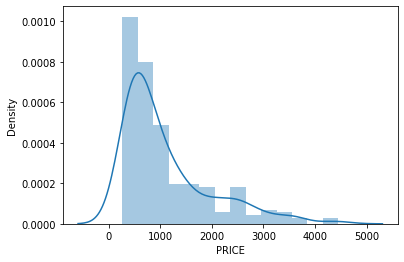

In [185]:
sns.distplot(df['PRICE'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


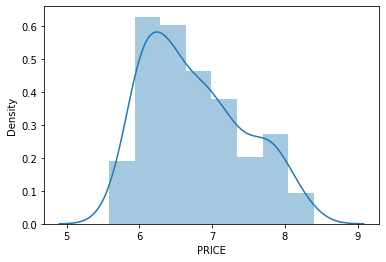

In [186]:
# Transform the target variable 
df['PRICE'] =df['PRICE'].astype(float)

sns.distplot(np.log(df['PRICE']))
plt.show()



> It can be seen that the `PRICE` distribution is not skewed after the transformation, but normally distributed.
>The transformed data will be used in in the dataframe and remove the skewed distribution:
**Normally distributed** means that the data is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 







In [187]:
df['PRICE_LOG'] = np.log(df.PRICE)
df.drop(["PRICE"], axis=1, inplace=True)

**Skew** is the degree of distortion from a normal distribution.
If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

Reviewing the skewness of each feature:

In [188]:
df.skew().sort_values(ascending=False)

ROOMS          1.488674
LIVING_AREA    0.795375
PRICE_LOG      0.490958
LATITUDE       0.000000
LONGITUDE      0.000000
POSTCODE      -0.751498
dtype: float64

>Values closer to zero are less skewed. The results show some features having a positive (right-tailed) or negative (left-tailed) skew.





In [189]:
print(df['PRICE_LOG'].skew())
df['PRICE_LOG'].describe()

0.49095821282057284


count    239.000000
mean       6.757613
std        0.678700
min        5.579730
25%        6.168550
50%        6.620073
75%        7.296270
max        8.400659
Name: PRICE_LOG, dtype: float64

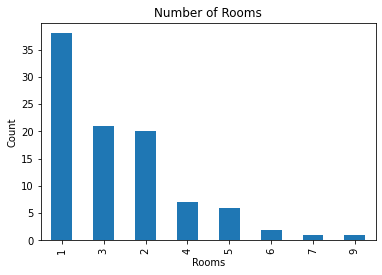

In [190]:
df['ROOMS'].value_counts().plot(kind='bar')
plt.title('Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine
plt.show()

> The diagram states that thre are more frequent values of rooms that are only for one person that ones for more, such as 6 or 7.

Factor plot is informative when there are multiple groups to compare. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

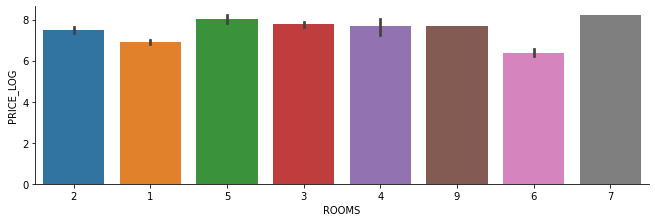

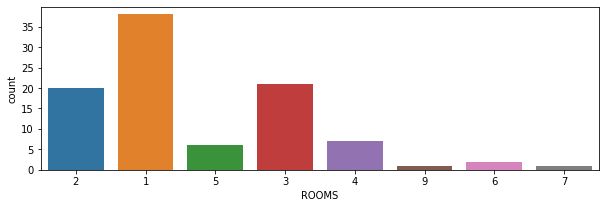

In [191]:
sns.factorplot('ROOMS', 'PRICE_LOG', data=df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('ROOMS', data=df)
df['PRICE_LOG'].value_counts()
plt.show()

>The graph shows that:
* Real estate with 5 rooms has the  highest `Price` 
* The sales for one-room or two-rooms housing property are the most whereas those with 6 or 7 rooms are the least

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


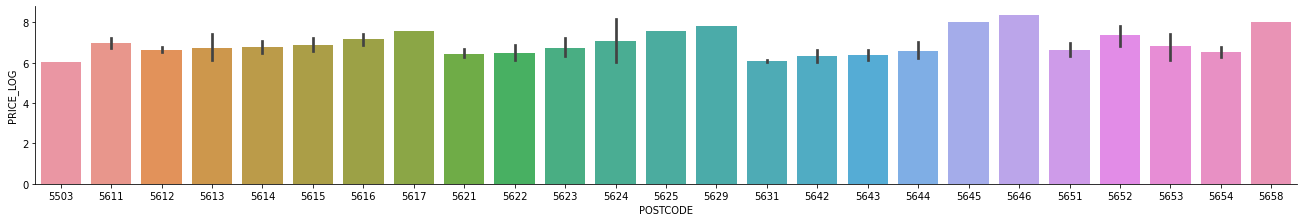

In [192]:
sns.factorplot('POSTCODE', 'PRICE_LOG', data=df,kind='bar',size=3,aspect=6)
plt.show()

>The diagram represents:
* The `price` of a rpoperty, depending on its `postcode`, which means that it states in which regions the price varies.




# Finding outliers

> An **outlier** is a data point in a data set that is distant from all other observations (a data point that lies outside the overall distribution of the dataset.)

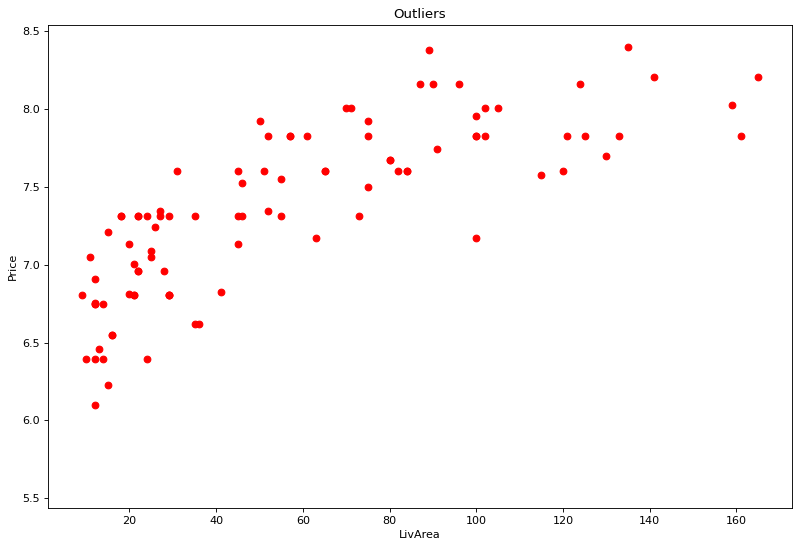

In [193]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df.LIVING_AREA, df.PRICE_LOG, c= 'red')
plt.title("Outliers")
plt.xlabel("LivArea")
plt.ylabel("Price")
plt.show()

# Converting 
* Converting all categorical variables into numeric ones to use them in the training of the models.



One-Hot Encoding: 
This process takes categorical variables and converts them to a numerical representation without an arbitrary ordering. What computers know is numbers and for machine learning it is vital to accommodate the feautures into numeric values. 

In [194]:
df['PRICE_LOG'] =df['PRICE_LOG'].astype(float)
df['POSTCODE'] =df['POSTCODE'].astype(int)
df['LIVING_AREA'] =df['LIVING_AREA'].astype(float)
df['ROOMS'] =df['ROOMS'].astype(float)
code_numeric = {'Kamer': 5,'Apartment': 1, 'Appartement': 1, 'Room': 2, 'Studio': 4, 'House': 3}
df ['TYPE'] = df['TYPE'].map(code_numeric)
df['TYPE'] =df['TYPE'].astype(float)
agency_numeric = {'Friendly': 1,'Pararius': 2}
df ['AGENCY'] = df['AGENCY'].map(agency_numeric)
df['AGENCY'] =df['AGENCY'].astype(float)

<function matplotlib.pyplot.show>

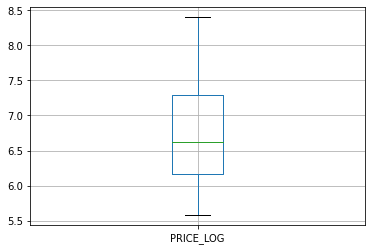

In [195]:
df.boxplot(column=['PRICE_LOG'])
plt.show

Most regression methods explicitly require outliers be removed from the dataset as they may significantly affect the results. To remove the outlier I used the following function:

In [196]:
#Check the mean values
df['LIVING_AREA'].mean()

57.104166666666664

In [197]:
#Check the median 
df['LIVING_AREA'].median()

46.0

In [198]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AGENCY          1.000000
TYPE            4.000000
POSTCODE       30.000000
LIVING_AREA    62.750000
ROOMS           2.000000
LONGITUDE       0.000000
LATITUDE        0.000000
PRICE_LOG       1.127719
dtype: float64


In [199]:
print(df['PRICE_LOG'].quantile(0.10))
print(df['PRICE_LOG'].quantile(0.90))

6.0234002296058655
7.824046010856292


# **Data cleaning & Data processing**

Showing that the values are already transformed to numeric and only the missing values have to be handled.

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 95
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGENCY       239 non-null    float64
 1   TYPE         239 non-null    float64
 2   STREET NAME  239 non-null    object 
 3   POSTCODE     239 non-null    int64  
 4   LIVING_AREA  96 non-null     float64
 5   ROOMS        96 non-null     float64
 6   LONGITUDE    239 non-null    float64
 7   LATITUDE     239 non-null    float64
 8   PRICE_LOG    239 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 23.7+ KB


There are missing values in the dataset, which appeared after the data integration of the two datasets. This will be fixed later before the training of the models.

In [201]:
df.isnull().sum()

AGENCY           0
TYPE             0
STREET NAME      0
POSTCODE         0
LIVING_AREA    143
ROOMS          143
LONGITUDE        0
LATITUDE         0
PRICE_LOG        0
dtype: int64

Checking if the percentage of missing values of each value and whic has to be dropped if any.

In [202]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0].style.background_gradient(cmap='Reds')
miss_val

,MissvalCount,Percent
ROOMS,143,59.83
LIVING_AREA,143,59.83


>The light red color shows the small amount of NaN values. If the features were with a high percent of missing values, they would have to be removed. Yet, in this case, they have relatively low percentage so they can be used in future. Then, the NaN values will be replaced.

Filling up the null values in order to train the model. 

In [203]:
df.fillna(0)

,AGENCY,TYPE,STREET NAME,POSTCODE,LIVING_AREA,ROOMS,LONGITUDE,LATITUDE,PRICE_LOG
0,1.0,5.0,Korianderstraat,5643,0.0,0.0,51.439265,5.478633,6.040255
1,1.0,5.0,Wattstraat,5621,0.0,0.0,51.439265,5.478633,6.086775
2,1.0,5.0,Wattstraat,5621,0.0,0.0,51.439265,5.478633,6.028279
3,1.0,5.0,Tongelresestraat,5642,0.0,0.0,51.439265,5.478633,6.028279
4,1.0,5.0,Schootsestraat,5616,0.0,0.0,51.439265,5.478633,6.075346
...,...,...,...,...,...,...,...,...,...
91,2.0,3.0,Mathijsenlaan,5644,165.0,7.0,51.439265,5.478633,8.202482
92,2.0,1.0,LeSagetenBroeklaan,5615,63.0,2.0,51.439265,5.478633,7.170120
93,2.0,1.0,Kerkakkerstraat,5616,55.0,2.0,51.439265,5.478633,7.313220
94,2.0,1.0,Hertogstraat,5611,100.0,3.0,51.439265,5.478633,7.170120


In [204]:
df.dropna(inplace=True)

In [205]:
df.isnull()

,AGENCY,TYPE,STREET NAME,POSTCODE,LIVING_AREA,ROOMS,LONGITUDE,LATITUDE,PRICE_LOG
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
91,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False


# Results

Saving into csv file.
This decision was made in order to store the results from the extracting data from two websites. Then, the csv can be used in the next part of the project - Modelling. 

In [206]:
df.to_csv('data.csv')

# **Conclusion**
**Data collection:**

For the data collection part, I decided to use `web scraping` as e technique because it gives the opportunity to work with a data set that is up to date and therefore, makes more accurate summaries.

**Web Scraping:**

With each housing property, there is the following:



*   TYPE
*   STREET NAME
*   POSTCODE
*   PRICE
*   LIVING AREA
*   ROOMS



**Data analysis:**

From the data analysis it was concluded that:
* There are missing values after the data integration of the two dataframes of the websites.
* The variable vary in types, so they will have to be handled in the next part of the EDA.

**Data preprocessing:**

I tried different types of data transforms to expose the data structure better, so we may be able to improve model accuracy later. What was noticed during the analysing: 
* There are certain outliers which will not interpret with the training of the modelling.

*   `Standardizing` was made to the data set so as to reduce the effects of differing distributions.
*   `The skewness` of the features was checked in order to see how distorted a data sample is from the normal distribution.
* `Rescaling (normalizing)` the dataset was also included to reduce the effects of differing scales
* The NaN values were filled in in order fo rthe model to be properly trained and give accurate results.


